# CycleGAN: Unpaired Image-to-Image Translation  

CycleGAN is a **generative adversarial network (GAN)** designed for **unpaired image-to-image translation**, meaning it can transform images between two domains **without requiring paired training data**. Unlike StyleGAN, which focuses on **high-quality image synthesis from latent space**, CycleGAN learns a **direct transformation between image distributions** while preserving structural details.

## How It Works  

CycleGAN employs two **generator-discriminator pairs**:  

- **Generators**:  
  - **G: X -> Y** (transforms an image from domain X to Y)  
  - **F: Y -> X** (transforms an image from domain Y to X)  

- **Discriminators**:  
  - **D_X** and **D_Y** distinguish real images from generated images.  

### Cycle Consistency Loss  
A key feature of CycleGAN is the **cycle consistency loss**, ensuring that an image can be converted back to its original form.

This prevents **arbitrary transformations** and helps maintain the original image structure.

In [1]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2516, done.
remote: Total 2516 (delta 0), reused 0 (delta 0), pack-reused 2516 (from 1)
Receiving objects: 100% (2516/2516), 8.20 MiB | 17.10 MiB/s, done.
Resolving deltas: 100% (1575/1575), done.


In [2]:
import os
os.chdir('pytorch-CycleGAN-and-pix2pix/')

In [ ]:
!pip install -r requirements.txt

# Datasets

Download one of the official datasets with:

-   `bash ./datasets/download_cyclegan_dataset.sh [apple2orange, summer2winter_yosemite, horse2zebra, monet2photo, cezanne2photo, ukiyoe2photo, vangogh2photo, maps, cityscapes, facades, iphone2dslr_flower, ae_photos]`

Or use your own dataset by creating the appropriate folders and adding in the images.

-   Create a dataset folder under `/dataset` for your dataset.
-   Create subfolders `testA`, `testB`, `trainA`, and `trainB` under your dataset's folder. Place any images you want to transform from a to b (cat2dog) in the `testA` folder, images you want to transform from b to a (dog2cat) in the `testB` folder, and do the same for the `trainA` and `trainB` folders.

In [7]:
!bash ./datasets/download_cyclegan_dataset.sh summer2winter_yosemite

Specified [summer2winter_yosemite]
for details.

--2025-02-18 15:28:47--  http://efrosgans.eecs.berkeley.edu/cyclegan/datasets/summer2winter_yosemite.zip
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 132640856 (126M) [application/zip]
Saving to: ‘./datasets/summer2winter_yosemite.zip’

./datasets/summer2w 100%[===================>] 126.50M   476KB/s    in 4m 49s  

2025-02-18 15:33:37 (447 KB/s) - ‘./datasets/summer2winter_yosemite.zip’ saved [132640856/132640856]

Archive:  ./datasets/summer2winter_yosemite.zip
   creating: ./datasets/summer2winter_yosemite/trainA/
  inflating: ./datasets/summer2winter_yosemite/trainA/2014-07-01 10:31:48.jpg  
  inflating: ./datasets/summer2winter_yosemite/trainA/2015-07-01 23:43:46.jpg  
  inflating: ./datasets/summer2winter_yosemite/trainA/2014-07-27 21

# Pretrained models

Download one of the official pretrained models with:

-   `bash ./scripts/download_cyclegan_model.sh [apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower]`

Or add your own pretrained model to `./checkpoints/{NAME}_pretrained/latest_net_G.pt`

In [8]:
!bash ./scripts/download_cyclegan_model.sh summer2winter_yosemite

Note: available models are apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower
Specified [summer2winter_yosemite]
for details.

--2025-02-18 15:44:26--  http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/summer2winter_yosemite.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45575747 (43M)
Saving to: ‘./checkpoints/summer2winter_yosemite_pretrained/latest_net_G.pth’

./checkpoints/summe 100%[===================>]  43.46M  7.92MB/s    in 7.6s    

2025-02-18 15:44:34 (5.72 MB/s) - ‘./checkpoints/summer2winter_yosemite_pretrained/latest_

# Skip Training (Using pretrained model)

-   `python train.py --dataroot ./datasets/horse2zebra --name horse2zebra --model cycle_gan`

Change the `--dataroot` and `--name` to your own dataset's path and model's name. Use `--gpu_ids 0,1,..` to train on multiple GPUs and `--batch_size` to change the batch size. I've found that a batch size of 16 fits onto 4 V100s and can finish training an epoch in ~90s.


# Testing

-   `python test.py --dataroot datasets/horse2zebra/testA --name horse2zebra_pretrained --model test --no_dropout`

Change the `--dataroot` and `--name` to be consistent with your trained model's configuration.

> For your own experiments, you might want to specify --netG, --norm, --no_dropout to match the generator architecture of the trained model.

In [9]:
!python test.py --dataroot datasets/summer2winter_yosemite/testA --name summer2winter_yosemite_pretrained --model test --no_dropout

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: datasets/summer2winter_yosemite/testA	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                     

# Visualize

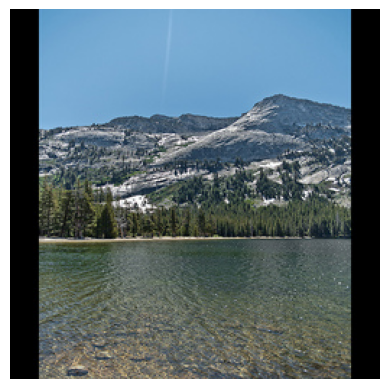

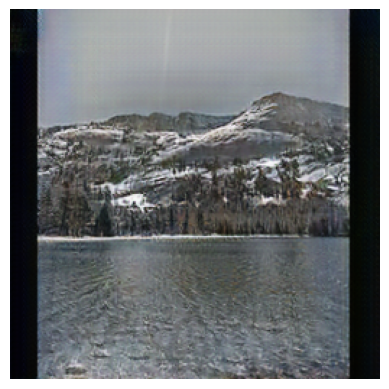

In [ ]:
import matplotlib.pyplot as plt

img = plt.imread('/results/summer2winter_yosemite_pretrained/2011-07-22 18:53:10_real.png')
img1 = plt.imread('/results/summer2winter_yosemite_pretrained/2011-07-22 18:53:10_fake.png')
plt.imshow(img)
plt.axis('off')
plt.show()
plt.imshow(img1)
plt.axis('off')
plt.show()

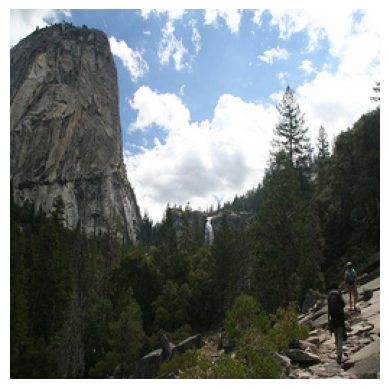

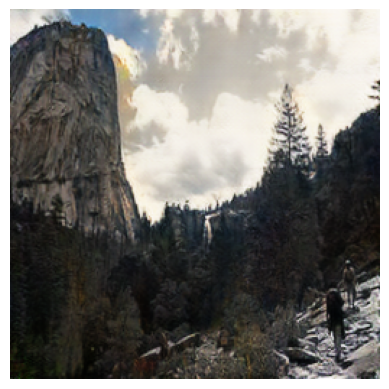

In [ ]:
img = plt.imread('/results/summer2winter_yosemite/2010-10-05 19:08:31_fake.png')
img1 = plt.imread('/results/summer2winter_yosemite/2010-10-05 19:08:31_real.png')
plt.imshow(img1)
plt.axis('off')
plt.show()
plt.imshow(img)
plt.axis('off')
plt.show()

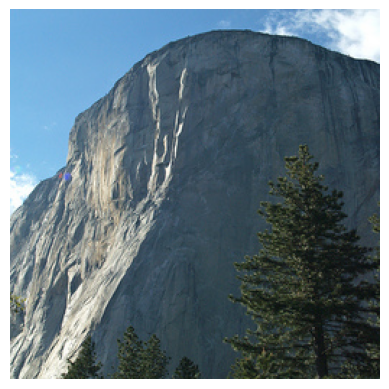

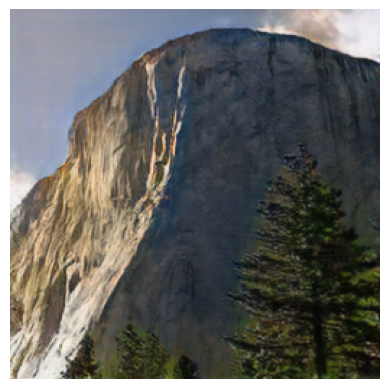

In [ ]:
import matplotlib.pyplot as plt

img = plt.imread('/results/summer2winter_yosemite/2011-05-23 17:46:40_real.png')
img1 = plt.imread('/results/summer2winter_yosemite/2011-05-23 17:46:40_fake.png')
plt.imshow(img)
plt.axis('off')
plt.show()
plt.imshow(img1)
plt.axis('off')
plt.show()